
# はじめに

単純なデータを主成分分析(PCA)することでPCAの意味を理解したい．
OpenCVのなかに「PCA」と名前のついた関数がある．
だからこの関数をつかってスクリプト(python)を動かしつつ推測して主成分の正体を見極めよう．

# すごく単純なデータセット

まずはじめはすごく簡単な2次元データの組を使う．



In [51]:
import numpy as np

data = np.array([
    [180.0, 50.0], [165.0, 65.0], [170.0, 55.0]
])


cv2のPCACompute関数を使うと主成分なるものがわかるようだ．
このとき二番目の引数のshapeに注意．



In [52]:
import cv2

mean, eigenvectors = cv2.PCACompute(
    data=data,
    mean=np.mean(data, axis=0).reshape(1, -1)
)

print(mean)
print(eigenvectors)

[[ 171.66666667   56.66666667]]
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]



得られる結果はつぎのとおり．

```
# mean 
[[ 0.5  0.5]]

# eigenvectors
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
```

meanは平均値になっている．
一方でeigenvectorsは…これが主成分らしい．



In [53]:
>>> print np.sqrt(2) / 2
0.70710678

0.707106781187


0.70710678


なのでeigenvectorsは…



$$ {}^t (\cos (\pi / 4)\, \sin(\pi / 4)) \\ $$
$$ {}^t (\cos (3\pi / 4)\, \sin(3\pi / 4) $$



ってわけか．

つまり，ここでの主成分とはデータの間をベクトルとそれに直行するベクトルということ．

# すこし変化を加える

第二象限(x軸の負の方向)に一つデータを加えてみる．



In [54]:
data = np.array([
    [180.0, 50.0], [165.0, 65.0], [170.0, 55.0]
])


同じようにPCAComputeに食わせる．



In [55]:
mean, eigenvectors = cv2.PCACompute(
    data=data,
    mean=np.mean(data, axis=0).reshape(1, -1)
)

print np.rad2deg(np.arccos(eigenvectors[:, 0]))
print np.rad2deg(np.arcsin(eigenvectors[:, 1]))

[ 135.   45.]
[ 45.  45.]



そのままだと主成分がわからないので角度（度数）に変換した．
結果は

```
[ 28.15496624  61.84503376]
[-28.15496624  61.84503376]
```

すこし右（x軸の負の方向）に引っ張られている．
主成分はデータセットのあいまをうまくとおるのか．

[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


<IPython.core.display.Javascript object>


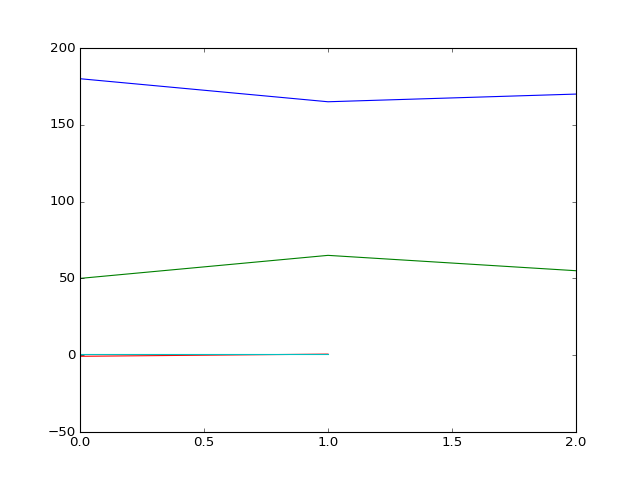

In [56]:
%matplotlib notebook

import matplotlib.pyplot as plt

print(eigenvectors)

plt.plot(data)
plt.show()

<IPython.core.display.Javascript object>


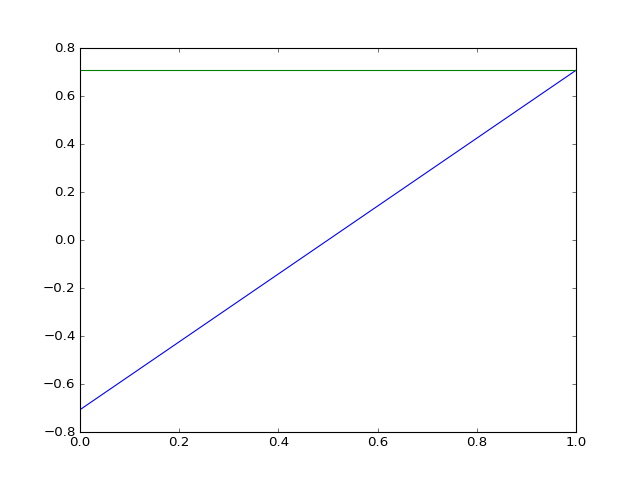

In [58]:
"""
plotしたいデータを計算する処理
...
"""
plt.plot(eigenvectors)
plt.show()

# まとめ

以上のことから主成分とは

* データの間をとおるベクトル
* それと直行するベクトル
* ベクトルは規格化されている

と推測される．